# Import required libraries

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras # Keras - software library ANN
from tensorflow.keras import layers
from keras.models import Sequential # linear stack of layers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM, RNN, GRU, SimpleRNN, Bidirectional
from tensorflow.keras import regularizers

# Reading the required editable dataset

In [ ]:
df_raw = pd.read_csv('Copy of Maharashtra Kwh dataset Apr-May - Sheet1.csv', header=None) # Reading dataset using pandas
df_raw=df_raw.dropna() # dropping NA items from datasets
df_raw_array = df_raw.values # obtaining values from raw datasets
 # Confirmation and visualization of dataset
df_raw.head()

,0,1
0,Date,Rounded Values
1,04/01/2021,2.03
2,04/02/2021,2.07
3,04/03/2021,2.03
4,04/04/2021,2.02


# Function for obtaining Matrix form

In [ ]:
# Function Definitionc.
def convertSeriesToMatrix(vectorSeries, sequence_length):
    matrix=[]
    for i in range(len(vectorSeries)-sequence_length+1):
        matrix.append(vectorSeries[i:i+sequence_length])
    return matrix
# generate pseudo-random numbers for random processes.
np.random.seed(1234)

list_daily_load = [df_raw_array[i,:] for i in range(0, len(df_raw)) if i % 24 == 0]
list_hourly_load = [df_raw_array[i,1] for i in range(0, len(df_raw)) if i % 24 != 0]
sequence_length = 23 # len of seq for future value

# Data Extraction and Pre-Processing

In [ ]:
# Convert the vector to a 2D matrix
matrix_load = convertSeriesToMatrix(list_hourly_load, sequence_length)
matrix_load = np.array(matrix_load).astype(np.float) # Convert to float
shifted_value = matrix_load.mean()
matrix_load -= shifted_value # Subtract AND operation
print ("Data  shape: ", matrix_load.shape)
# split dataset: 80% for training and 20% for testing
train_row = int(round(0.6 * matrix_load.shape[0]))
train_set = matrix_load[:train_row, :]
np.random.shuffle(train_set)

Data  shape:  (23, 23)


# Training AND Testing Split & X and y split

In [ ]:
# Training set
X_train = train_set[:, :-1]
# The last column is the true value to compute the mean-squared-error loss
y_train = train_set[:, -1]
# The test set
X_test = matrix_load[train_row:, :-1]
y_test = matrix_load[train_row:, -1]
# The input to LSTM layer needs to have the shape of (number of samples, the dimension of each element)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Modelling of various Neural Networks

In [ ]:
 # RNN Hyperparameter Tuned

model_RNN1 = Sequential()

model_RNN1.add(SimpleRNN(200, activation='relu', return_sequences=True))

model_RNN1.add(SimpleRNN(150, activation='relu'))

model_RNN1.add(Dense(75))

#model_RNN1.add(Dense(10))
model_RNN1.add(Dense(1))
# model_RNN.add(Dropout(0.5))
opt = keras.optimizers.Adam(learning_rate= 0.0001)
model_RNN1.compile(optimizer='adam',loss=tf.keras.losses.MeanAbsolutePercentageError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_RNN1.fit(X_train, y_train, batch_size=512, epochs=1000, validation_split=0.05, verbose=1)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 99.4931 - root_mean_squared_error: 0.1746 - val_loss: 13.5540 - val_root_mean_squared_error: 0.0035
Epoch 2/1000
1/1 [==============================] - 0s 45ms/step - loss: 117.4458 - root_mean_squared_error: 0.1811 - val_loss: 9.7987 - val_root_mean_squared_error: 0.0025
Epoch 3/1000
1/1 [==============================] - 0s 43ms/step - loss: 121.4971 - root_mean_squared_error: 0.1763 - val_loss: 11.9416 - val_root_mean_squared_error: 0.0031
Epoch 4/1000
1/1 [==============================] - 0s 44ms/step - loss: 106.3354 - root_mean_squared_error: 0.1743 - val_loss: 44.2159 - val_root_mean_squared_error: 0.0115
Epoch 5/1000
1/1 [==============================] - 0s 52ms/step - loss: 89.5442 - root_mean_squared_error: 0.1773 - val_loss: 76.2168 - val_root_mean_squared_error: 0.0198
Epoch 6/1000
1/1 [==============================] - 0s 48ms/step - loss: 74.0846 - root_mean_squared_error: 0.1785 - val_loss: 46.9535 

In [ ]:
# #Hyperparameter Tuned GRU model

model_GRU1 = Sequential()

model_GRU1.add(GRU(150, activation='relu', return_sequences=True))

model_GRU1.add(GRU(100, activation='relu'))

model_GRU1.add(Dense(75))

model_GRU1.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate= 0.0007)
model_GRU1.compile(optimizer='adam',loss=tf.keras.losses.MeanAbsolutePercentageError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_GRU1.fit(X_train, y_train, batch_size=512, epochs=1000, validation_split=0.05, verbose=1)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 107.4965 - root_mean_squared_error: 0.1758 - val_loss: 4.5863 - val_root_mean_squared_error: 0.0012
Epoch 2/1000
1/1 [==============================] - 0s 65ms/step - loss: 113.2314 - root_mean_squared_error: 0.1819 - val_loss: 15.8118 - val_root_mean_squared_error: 0.0041
Epoch 3/1000
1/1 [==============================] - 0s 65ms/step - loss: 104.3912 - root_mean_squared_error: 0.1809 - val_loss: 46.3984 - val_root_mean_squared_error: 0.0120
Epoch 4/1000
1/1 [==============================] - 0s 66ms/step - loss: 85.0013 - root_mean_squared_error: 0.1787 - val_loss: 71.3928 - val_root_mean_squared_error: 0.0185
Epoch 5/1000
1/1 [==============================] - 0s 65ms/step - loss: 76.7749 - root_mean_squared_error: 0.1773 - val_loss: 94.5338 - val_root_mean_squared_error: 0.0245
Epoch 6/1000
1/1 [==============================] - 0s 64ms/step - loss: 97.5206 - root_mean_squared_error: 0.1760 - val_loss: 93.0709 

# Testing and Evaluation

In [ ]:
# #Hyperparameter Tuned GRU model

model_Bi1 = Sequential()

model_Bi1.add(Bidirectional(LSTM(150, activation='relu', return_sequences=True)))

model_Bi1.add(Bidirectional(LSTM(100, activation='relu')))

model_Bi1.add(Dense(100))

model_Bi1.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate= 0.0007)
model_Bi1.compile(optimizer='adam',loss=tf.keras.losses.MeanAbsolutePercentageError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_Bi1.fit(X_train, y_train, batch_size=512, epochs=1000, validation_split=0.05, verbose=1)

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 88.6255 - root_mean_squared_error: 0.1765 - val_loss: 48.1055 - val_root_mean_squared_error: 0.0125
Epoch 2/1000
1/1 [==============================] - 0s 131ms/step - loss: 156.0141 - root_mean_squared_error: 0.1872 - val_loss: 27.9662 - val_root_mean_squared_error: 0.0072
Epoch 3/1000
1/1 [==============================] - 0s 139ms/step - loss: 140.3103 - root_mean_squared_error: 0.1853 - val_loss: 19.6523 - val_root_mean_squared_error: 0.0051
Epoch 4/1000
1/1 [==============================] - 0s 130ms/step - loss: 102.9444 - root_mean_squared_error: 0.1812 - val_loss: 69.7454 - val_root_mean_squared_error: 0.0181
Epoch 5/1000
1/1 [==============================] - 0s 140ms/step - loss: 77.4093 - root_mean_squared_error: 0.1776 - val_loss: 110.8411 - val_root_mean_squared_error: 0.0287
Epoch 6/1000
1/1 [==============================] - 0s 161ms/step - loss: 109.8767 - root_mean_squared_error: 0.1754 - val_loss: 

In [ ]:
# SimpleRNN model Testing
test_mse_RNN1 = model_RNN1.evaluate(X_train, y_train, verbose=1)
# get the predicted values
predicted_values_RNN1 = model_RNN1.predict(X_train)
num_test_samples = len(predicted_values_RNN1)

predicted_values_RNN1 = np.reshape(predicted_values_RNN1, (num_test_samples,1))

1/1 [==============================] - 0s 29ms/step - loss: 4.1002 - root_mean_squared_error: 0.0027


In [ ]:
test_mse_GRU1 = model_GRU1.evaluate(X_train, y_train, verbose=1)

# get the predicted values
predicted_values_GRU1 = model_GRU1.predict(X_train)
num_test_samples = len(predicted_values_GRU1)
predicted_values_GRU1 = np.reshape(predicted_values_GRU1, (num_test_samples,1))

1/1 [==============================] - 0s 27ms/step - loss: 25.4645 - root_mean_squared_error: 0.1552


In [ ]:
test_mse_Bi1 = model_Bi1.evaluate(X_train, y_train, verbose=1)

# get the predicted values
predicted_values_Bi1 = model_Bi1.predict(X_train)
num_test_samples = len(predicted_values_GRU1)
predicted_values_Bi1 = np.reshape(predicted_values_Bi1, (num_test_samples,1))

1/1 [==============================] - 0s 41ms/step - loss: 25.6617 - root_mean_squared_error: 0.1653


# Visualization of Results

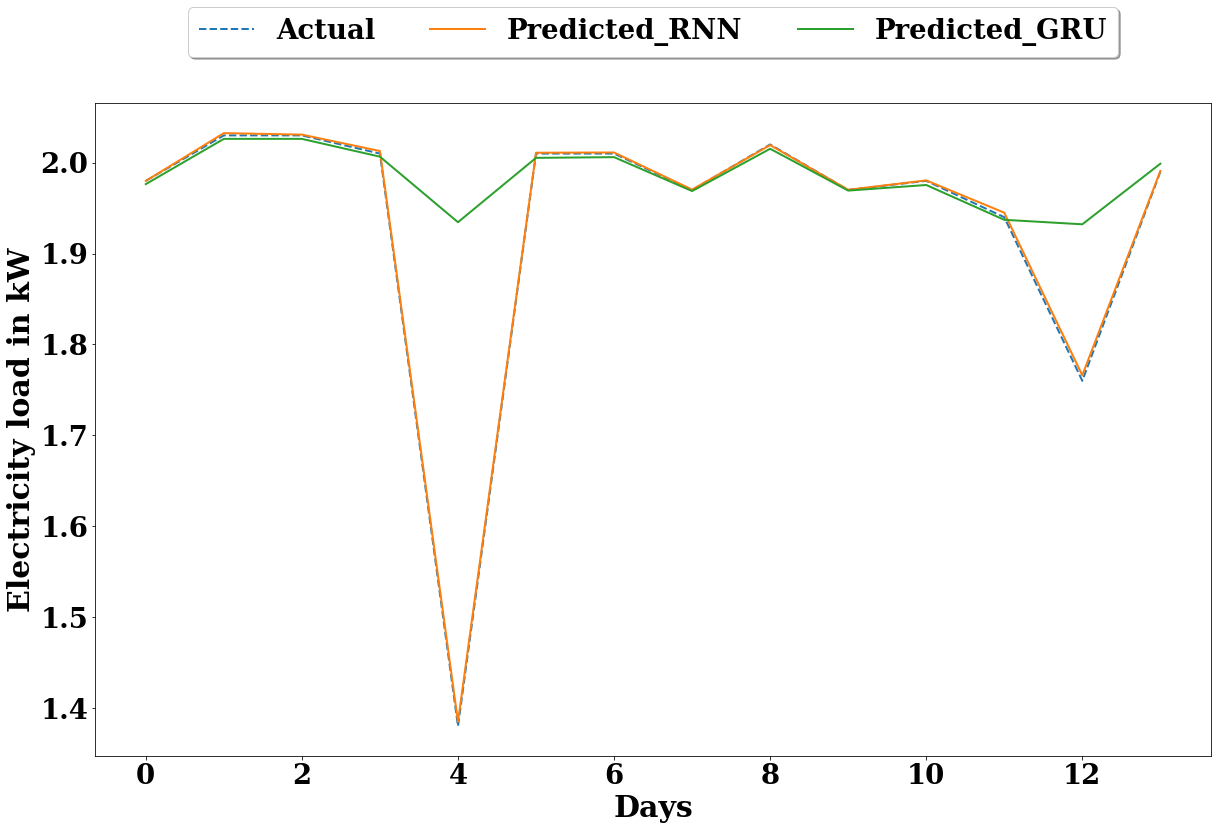

In [ ]:
from matplotlib.pyplot import figure
fig = plt.figure()

axis_font = {'family':'serif', 'size':'30', 'weight' : 'bold'}

font = {'family' : 'Times New Roman',
        'weight': 'bold',
        'size'   : 27.5}

plt.rc('font', **font)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.plot(y_train + shifted_value, label = 'Actual', linewidth=2, linestyle = 'dashed' )

plt.plot(predicted_values_RNN1 + shifted_value, label = 'Predicted_RNN', linewidth=2)
plt.plot(predicted_values_GRU1 + shifted_value, label = 'Predicted_GRU', linewidth=2)

plt.xlabel('Days', **axis_font)
plt.ylabel('Electricity load in kW', **axis_font)
#legend = plt.legend(loc = 'lower left', prop={'size': 18})
plt.legend(loc='lower center', bbox_to_anchor=(0.5,1.05),
          ncol=3, fancybox=True, shadow=True)

fig = plt.gcf()
fig.set_size_inches(20, 12)

fig.savefig('output_load_forecasting.jpg', bbox_inches='tight')
plt.show()